In [1]:
import glob as glob
import pandas as pd
import pickle
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

In [2]:
sns.set_context("notebook")

In [3]:
samples = sorted(
    list(
        set(
            [
                x.split("/")[-1].split(".")[0]
                for x in sorted(glob.glob("cistopic_qc_out/*__metadata_bc.pkl"))
            ]
        )
    )
)
samples

['BIO_ddseq_m1c1',
 'BIO_ddseq_m1c2',
 'BIO_ddseq_m1c3',
 'BIO_ddseq_m1c4',
 'BIO_ddseq_m1c5',
 'BIO_ddseq_m1c6',
 'BIO_ddseq_m1c7',
 'BIO_ddseq_m1c8',
 'BIO_ddseq_m2c1',
 'BIO_ddseq_m2c2',
 'BIO_ddseq_m2c3',
 'BIO_ddseq_m2c4',
 'OHS_s3atac_mouse',
 'TXG_10xmultiome_e18mousebrainfresh',
 'TXG_10xv11_adultmousecortexchromiumx',
 'TXG_10xv1_adultmousefresh',
 'TXG_10xv2_adultmousecortex',
 'TXG_10xv2_adultmousecortexchromiumx',
 'VIB_hydrop_1',
 'VIB_hydrop_2',
 'VIB_hydrop_3',
 'VIB_hydrop_4',
 'VIB_hydrop_5']

In [4]:
len(samples)

23

In [5]:
techs = sorted(list(set([x.split("_")[1] for x in samples])))
techs

['10xmultiome', '10xv1', '10xv11', '10xv2', 'ddseq', 'hydrop', 's3atac']

In [6]:
samples_tech_dict = {x: x.split("_")[1] for x in samples}
samples_tech_dict

{'BIO_ddseq_m1c1': 'ddseq',
 'BIO_ddseq_m1c2': 'ddseq',
 'BIO_ddseq_m1c3': 'ddseq',
 'BIO_ddseq_m1c4': 'ddseq',
 'BIO_ddseq_m1c5': 'ddseq',
 'BIO_ddseq_m1c6': 'ddseq',
 'BIO_ddseq_m1c7': 'ddseq',
 'BIO_ddseq_m1c8': 'ddseq',
 'BIO_ddseq_m2c1': 'ddseq',
 'BIO_ddseq_m2c2': 'ddseq',
 'BIO_ddseq_m2c3': 'ddseq',
 'BIO_ddseq_m2c4': 'ddseq',
 'OHS_s3atac_mouse': 's3atac',
 'TXG_10xmultiome_e18mousebrainfresh': '10xmultiome',
 'TXG_10xv11_adultmousecortexchromiumx': '10xv11',
 'TXG_10xv1_adultmousefresh': '10xv1',
 'TXG_10xv2_adultmousecortex': '10xv2',
 'TXG_10xv2_adultmousecortexchromiumx': '10xv2',
 'VIB_hydrop_1': 'hydrop',
 'VIB_hydrop_2': 'hydrop',
 'VIB_hydrop_3': 'hydrop',
 'VIB_hydrop_4': 'hydrop',
 'VIB_hydrop_5': 'hydrop'}

In [7]:
samples_bytech = {}
for tech in techs:
    samples_in_tech = []
    for sample in samples:
        if samples_tech_dict[sample] == tech:
            samples_in_tech.append(sample)

    samples_bytech[tech] = samples_in_tech

In [8]:
samples_bytech

{'10xmultiome': ['TXG_10xmultiome_e18mousebrainfresh'],
 '10xv1': ['TXG_10xv1_adultmousefresh'],
 '10xv11': ['TXG_10xv11_adultmousecortexchromiumx'],
 '10xv2': ['TXG_10xv2_adultmousecortex',
  'TXG_10xv2_adultmousecortexchromiumx'],
 'ddseq': ['BIO_ddseq_m1c1',
  'BIO_ddseq_m1c2',
  'BIO_ddseq_m1c3',
  'BIO_ddseq_m1c4',
  'BIO_ddseq_m1c5',
  'BIO_ddseq_m1c6',
  'BIO_ddseq_m1c7',
  'BIO_ddseq_m1c8',
  'BIO_ddseq_m2c1',
  'BIO_ddseq_m2c2',
  'BIO_ddseq_m2c3',
  'BIO_ddseq_m2c4'],
 'hydrop': ['VIB_hydrop_1',
  'VIB_hydrop_2',
  'VIB_hydrop_3',
  'VIB_hydrop_4',
  'VIB_hydrop_5'],
 's3atac': ['OHS_s3atac_mouse']}

In [9]:
selected_barcodes_dict = {
    x.split("/")[-1].split(f".")[0]: x
    for x in sorted(glob.glob("../public_3_cistopic_qc/selected_barcodes/*pkl"))
}
selected_barcodes_dict

{'BIO_ddseq_m1c1': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c1.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m1c2': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c2.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m1c3': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c3.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m1c4': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c4.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m1c5': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c5.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m1c6': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c6.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m1c7': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c7.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m1c8': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m1c8.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_m2c1': '../public_3_cistopic_qc/selected_barcodes/BIO_ddseq_m2c1.FULL_bc_passing_filters_ots

In [10]:
write = True
for sample in samples:
    print(sample)
    metadata_list = sorted(glob.glob(f"cistopic_qc_out/{sample}.*metadata_bc.pkl*"))
    with open(selected_barcodes_dict[sample], "rb") as f:
        selected_barcodes = pickle.load(f)

        if sample == "OHS_s3atac_mouse":
            selected_barcodes = [
                x.replace("OHS_s3atac_s3ATAC_Mouse", "OHS_s3atac_mouse")
                for x in selected_barcodes
            ]

        print(f"\t{len(selected_barcodes)}")
        n_original_bcs = len(selected_barcodes)
    for file in metadata_list:
        depth = file.split("/")[-1].split(".")[-2].replace("__metadata_bc", "")
        selected_barcodes_depthadjusted = [
            x.replace("FULL.fragments.tsv.gz", depth) for x in selected_barcodes
        ]

        print(f"\t{file}")
        with open(file, "rb") as f:
            metadata_df = pickle.load(f)
            metadata_df.index = [x for x in metadata_df.index]
        try:
            metadata_df_sub = metadata_df.loc[selected_barcodes_depthadjusted]
            print(f"\t\t{len(metadata_df_sub)}")
            if write == True:
                metadata_df_sub.to_csv(
                    f"selected_barcodes_metadata/{sample}.{depth}__metadata.tsv",
                    sep="\t",
                )

        except:
            selected_barcodes_depthadjusted = list(
                set(metadata_df.index).intersection(
                    set(selected_barcodes_depthadjusted)
                )
            )
            metadata_df_sub = metadata_df.loc[selected_barcodes_depthadjusted]
            print(
                f"\t\terror!!! Only {len(metadata_df_sub)} barcodes found. d = {n_original_bcs - len(metadata_df_sub)}, {round((n_original_bcs - len(metadata_df_sub))/n_original_bcs*100, 2)}%"
            )
        if write == True:
            metadata_df_sub.to_csv(
                f"selected_barcodes_metadata/{sample}.{depth}__metadata.tsv", sep="\t"
            )

BIO_ddseq_m1c1
	4254
	cistopic_qc_out/BIO_ddseq_m1c1.10k__metadata_bc.pkl
		4254
	cistopic_qc_out/BIO_ddseq_m1c1.15k__metadata_bc.pkl
		4254
	cistopic_qc_out/BIO_ddseq_m1c1.20k__metadata_bc.pkl
		4254
	cistopic_qc_out/BIO_ddseq_m1c1.5k__metadata_bc.pkl
		4254
BIO_ddseq_m1c2
	4688
	cistopic_qc_out/BIO_ddseq_m1c2.10k__metadata_bc.pkl
		4688
	cistopic_qc_out/BIO_ddseq_m1c2.15k__metadata_bc.pkl
		4688
	cistopic_qc_out/BIO_ddseq_m1c2.20k__metadata_bc.pkl
		4688
	cistopic_qc_out/BIO_ddseq_m1c2.25k__metadata_bc.pkl
		4688
	cistopic_qc_out/BIO_ddseq_m1c2.30k__metadata_bc.pkl
		4688
	cistopic_qc_out/BIO_ddseq_m1c2.5k__metadata_bc.pkl
		4688
BIO_ddseq_m1c3
	4396
	cistopic_qc_out/BIO_ddseq_m1c3.10k__metadata_bc.pkl
		4396
	cistopic_qc_out/BIO_ddseq_m1c3.15k__metadata_bc.pkl
		4396
	cistopic_qc_out/BIO_ddseq_m1c3.20k__metadata_bc.pkl
		4396
	cistopic_qc_out/BIO_ddseq_m1c3.25k__metadata_bc.pkl
		4396
	cistopic_qc_out/BIO_ddseq_m1c3.30k__metadata_bc.pkl
		4396
	cistopic_qc_out/BIO_ddseq_m1c3.5k__met

In [11]:
samples

['BIO_ddseq_m1c1',
 'BIO_ddseq_m1c2',
 'BIO_ddseq_m1c3',
 'BIO_ddseq_m1c4',
 'BIO_ddseq_m1c5',
 'BIO_ddseq_m1c6',
 'BIO_ddseq_m1c7',
 'BIO_ddseq_m1c8',
 'BIO_ddseq_m2c1',
 'BIO_ddseq_m2c2',
 'BIO_ddseq_m2c3',
 'BIO_ddseq_m2c4',
 'OHS_s3atac_mouse',
 'TXG_10xmultiome_e18mousebrainfresh',
 'TXG_10xv11_adultmousecortexchromiumx',
 'TXG_10xv1_adultmousefresh',
 'TXG_10xv2_adultmousecortex',
 'TXG_10xv2_adultmousecortexchromiumx',
 'VIB_hydrop_1',
 'VIB_hydrop_2',
 'VIB_hydrop_3',
 'VIB_hydrop_4',
 'VIB_hydrop_5']

In [12]:
metadata_df_dict = {}
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(f"selected_barcodes_metadata/{sample}.*k__metadata.tsv")
    )

    if not metadata_list == []:
        metadata_df = pd.DataFrame()
        for file in metadata_list:
            depth = file.split("/")[-1].split(".")[1].split("__")[0]

            metadata_df_selected_barcodes = pd.read_csv(file, sep="\t")
            metadata_df[depth] = metadata_df_selected_barcodes.median()

        # print(metadata_df)
        metadata_df = metadata_df.T
        metadata_df["depth"] = [
            int(x) for x in [x.replace("k", "") for x in metadata_df.index]
        ]
        metadata_df["sample"] = sample
        metadata_df_dict[sample] = metadata_df.loc[
            metadata_df.index[
                np.argsort(
                    [int(x) for x in [x.replace("k", "") for x in metadata_df.index]]
                )
            ]
        ]

BIO_ddseq_m1c1
BIO_ddseq_m1c2
BIO_ddseq_m1c3


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

BIO_ddseq_m1c4


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

BIO_ddseq_m1c5
BIO_ddseq_m1c6


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

BIO_ddseq_m1c7
BIO_ddseq_m1c8
BIO_ddseq_m2c1


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

BIO_ddseq_m2c2
BIO_ddseq_m2c3
BIO_ddseq_m2c4


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

OHS_s3atac_mouse
TXG_10xmultiome_e18mousebrainfresh


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

TXG_10xv11_adultmousecortexchromiumx
TXG_10xv1_adultmousefresh


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

TXG_10xv2_adultmousecortex


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

TXG_10xv2_adultmousecortexchromiumx


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

VIB_hydrop_1
VIB_hydrop_2
VIB_hydrop_3


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

VIB_hydrop_4
VIB_hydrop_5


/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_181592/1256388511.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select onl

## now add some mapping statistics

In [13]:
variables = [
    "Log_total_nr_frag",
    "Log_unique_nr_frag",
    "Total_nr_frag",
    "Unique_nr_frag",
    "Dupl_nr_frag",
    "Dupl_rate",
    "Total_nr_frag_in_regions",
    "Unique_nr_frag_in_regions",
    "FRIP",
    "TSS_enrichment",
]

10xmultiome
['TXG_10xmultiome_e18mousebrainfresh']
10xv1
['TXG_10xv1_adultmousefresh']
10xv11
['TXG_10xv11_adultmousecortexchromiumx']
10xv2
['TXG_10xv2_adultmousecortex', 'TXG_10xv2_adultmousecortexchromiumx']
ddseq
['BIO_ddseq_m1c1', 'BIO_ddseq_m1c2', 'BIO_ddseq_m1c3', 'BIO_ddseq_m1c4', 'BIO_ddseq_m1c5', 'BIO_ddseq_m1c6', 'BIO_ddseq_m1c7', 'BIO_ddseq_m1c8', 'BIO_ddseq_m2c1', 'BIO_ddseq_m2c2', 'BIO_ddseq_m2c3', 'BIO_ddseq_m2c4']
hydrop
['VIB_hydrop_1', 'VIB_hydrop_2', 'VIB_hydrop_3', 'VIB_hydrop_4', 'VIB_hydrop_5']
s3atac
['OHS_s3atac_mouse']


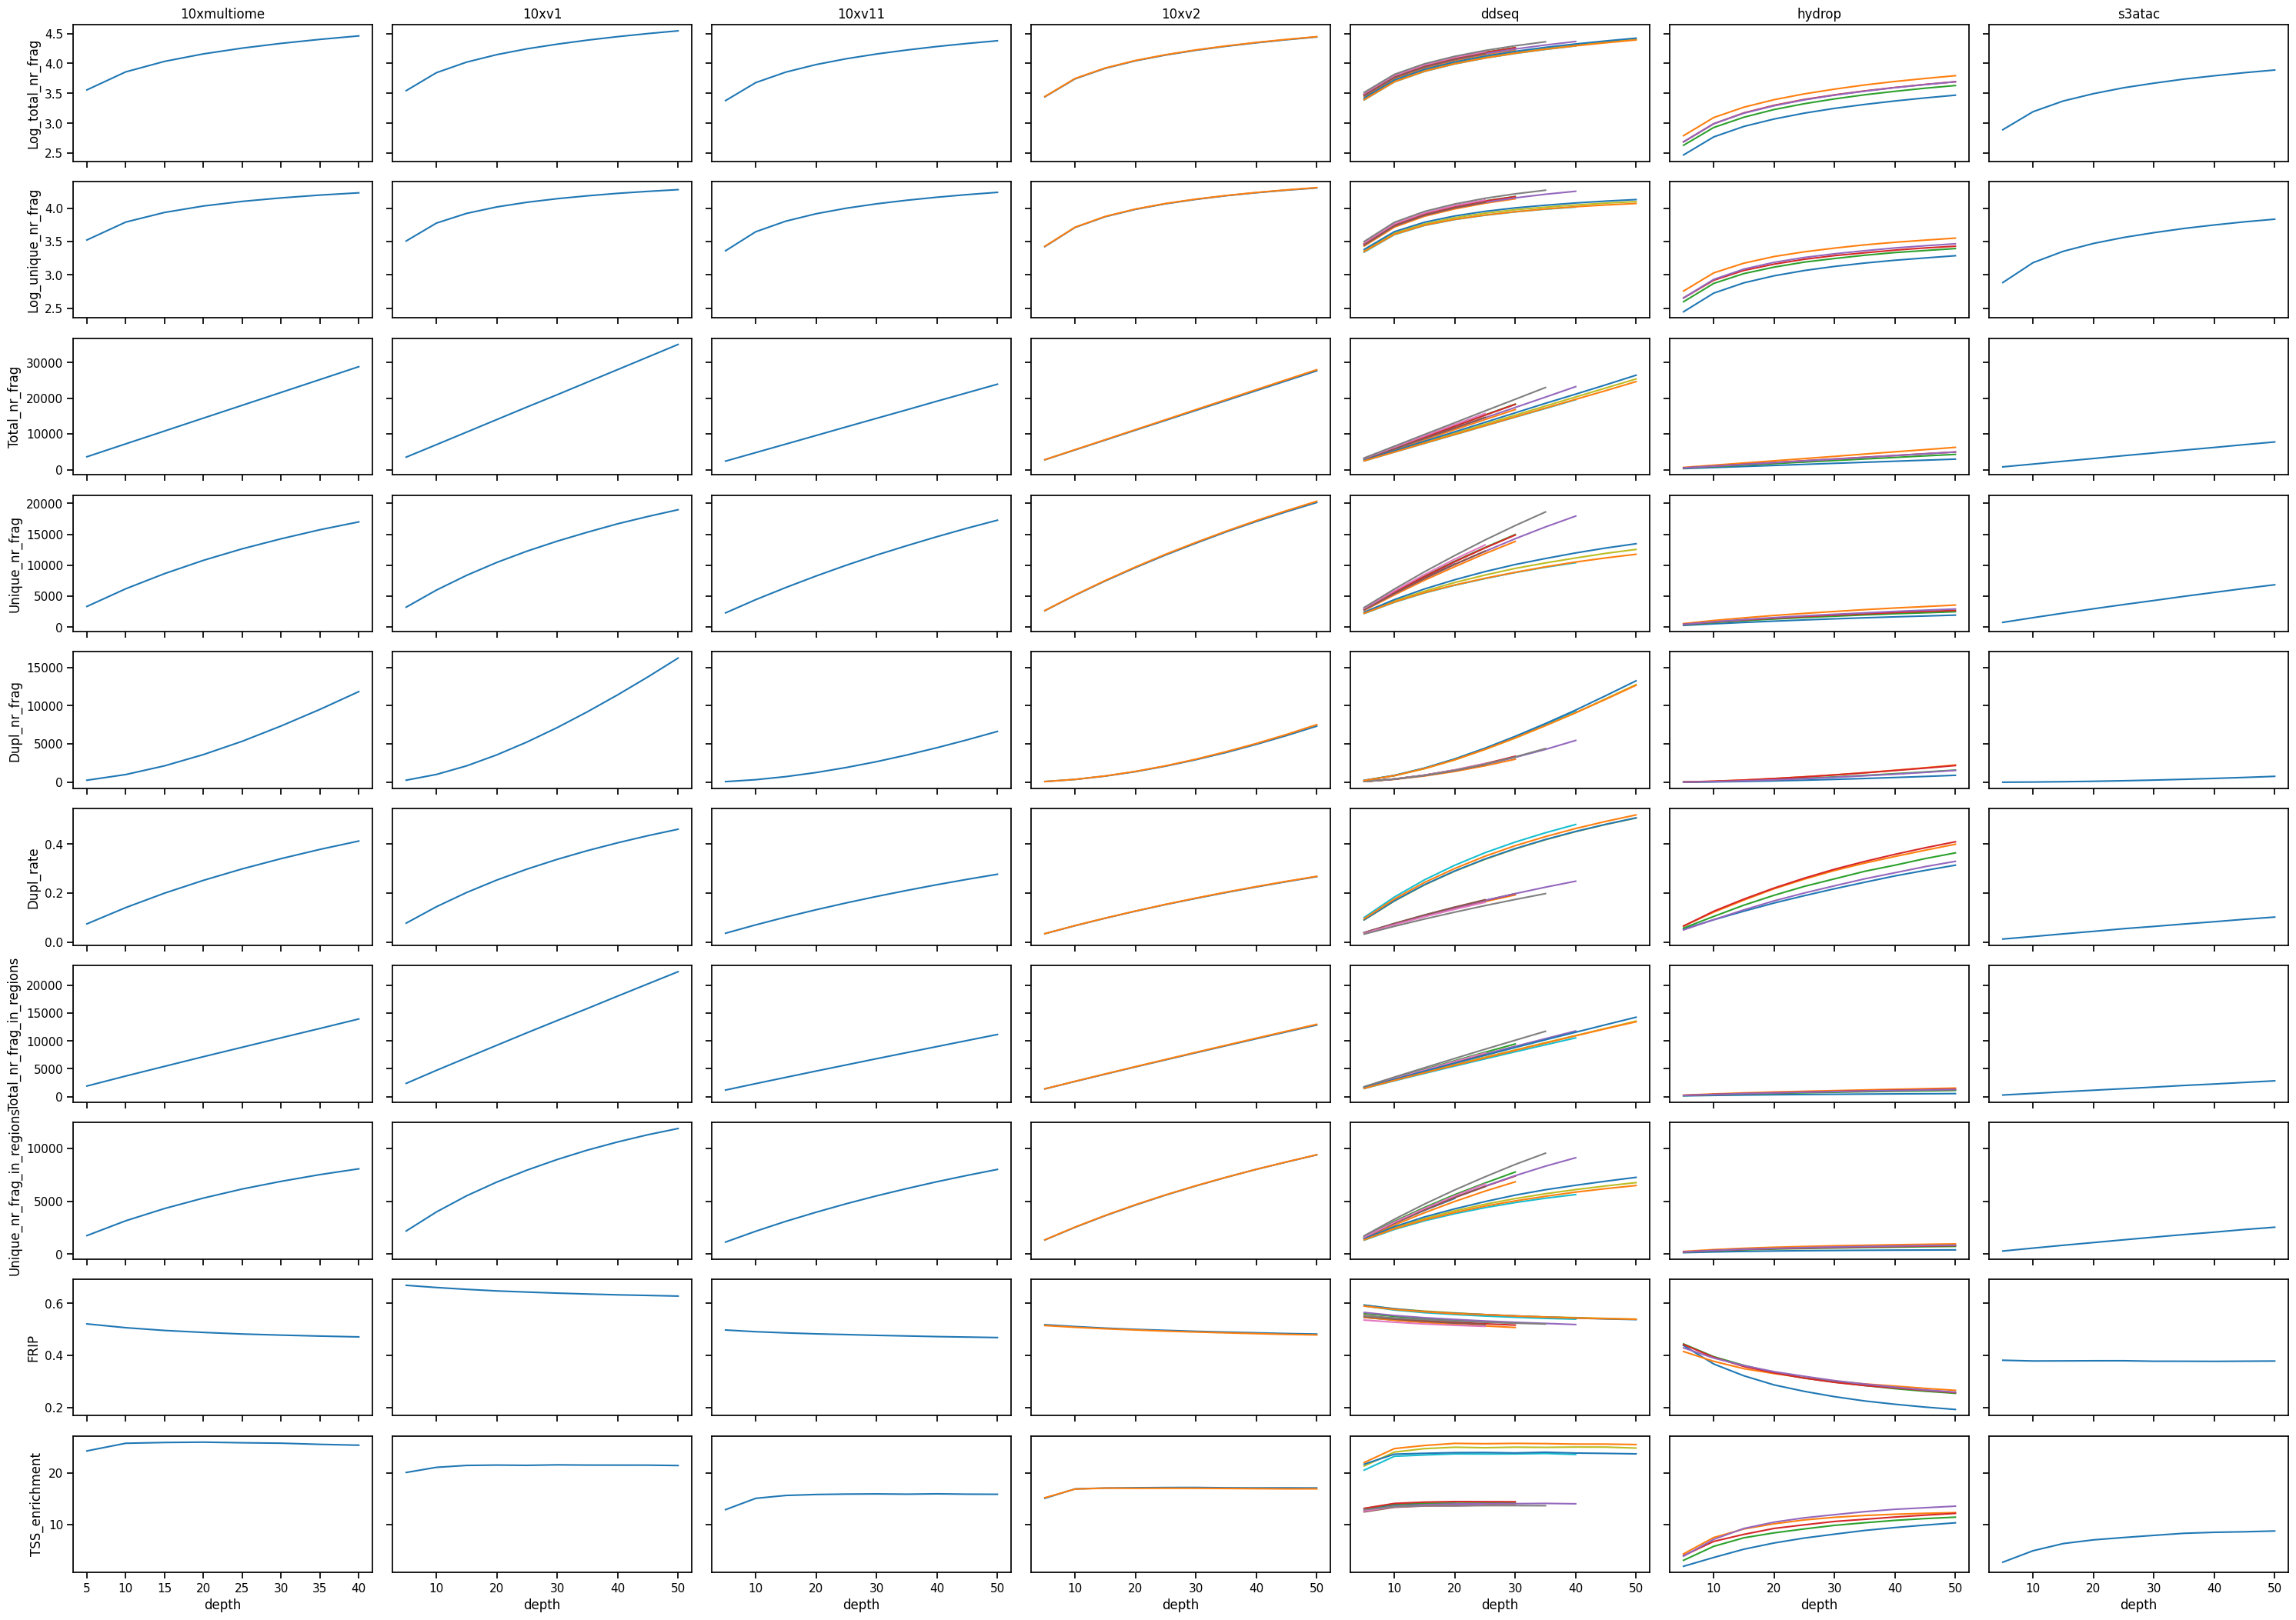

In [14]:
fig, axes = plt.subplots(
    len(variables),
    len(samples_bytech.keys()),
    figsize=(3 * len(variables), 3 * len(samples_bytech.keys())),
    sharex="col",
    sharey="row",
)

for tech in samples_bytech.keys():
    print(tech)

    samples_in_tech = samples_bytech[tech]
    print(samples_in_tech)
    for sample in samples_in_tech:
        if sample in metadata_df_dict.keys():
            metadata_df = metadata_df_dict[sample]
            for variable in variables:
                sns.lineplot(
                    data=metadata_df,
                    x="depth",
                    y=variable,
                    ax=axes[
                        variables.index(variable),
                        list(samples_bytech.keys()).index(tech),
                    ],
                )

plt.tight_layout()

for ax, tech in zip(axes[0], techs):
    ax.set_title(tech)

plt.savefig("plts/all_variables_massive.png", dpi=300, facecolor="w")
plt.show()

# Combined figure

In [15]:
metadata_df_combined = pd.DataFrame()
for sample in metadata_df_dict.keys():
    metadata_df = metadata_df_dict[sample][:]
    metadata_df.index = [x + f"__{sample}" for x in metadata_df.index]
    metadata_df_combined = pd.concat([metadata_df_combined, metadata_df])

metadata_df_combined["tech"] = [x.split("_")[1] for x in metadata_df_combined["sample"]]

In [16]:
metadata_df_combined

,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,depth,sample,tech
5k__BIO_ddseq_m1c1,3.470557,3.454235,2955.0,2846.0,112.0,0.039063,1604.0,1543.0,0.546128,12.829726,5,BIO_ddseq_m1c1,ddseq
10k__BIO_ddseq_m1c1,3.771771,3.739216,5912.5,5485.5,428.0,0.076103,3126.5,2907.0,0.536424,13.795133,10,BIO_ddseq_m1c1,ddseq
15k__BIO_ddseq_m1c1,3.946771,3.899957,8846.5,7942.5,928.0,0.110529,4629.0,4143.0,0.528432,13.950410,15,BIO_ddseq_m1c1,ddseq
20k__BIO_ddseq_m1c1,4.072213,4.009430,11809.0,10219.5,1596.0,0.142252,6097.5,5273.5,0.521378,14.080309,20,BIO_ddseq_m1c1,ddseq
5k__BIO_ddseq_m1c2,3.447623,3.432568,2803.0,2707.5,97.0,0.037310,1500.0,1447.0,0.546406,12.550000,5,BIO_ddseq_m1c2,ddseq
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30k__VIB_hydrop_5,3.469675,3.317646,2949.0,2078.0,652.0,0.230043,896.0,663.0,0.303361,11.906977,30,VIB_hydrop_5,hydrop
35k__VIB_hydrop_5,3.535547,3.363424,3432.0,2309.0,850.0,0.258577,996.0,715.0,0.290142,12.491228,35,VIB_hydrop_5,hydrop
40k__VIB_hydrop_5,3.594834,3.404663,3934.0,2539.0,1057.0,0.283368,1088.0,759.0,0.278176,12.945946,40,VIB_hydrop_5,hydrop
45k__VIB_hydrop_5,3.646404,3.437751,4430.0,2740.0,1297.0,0.308246,1180.0,799.0,0.267585,13.250000,45,VIB_hydrop_5,hydrop


In [17]:
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(
            f"preprocessing_out/data/reports/mapping_stats/{sample}.*k___{sample}__R1.mapping_stats.tsv"
        )
    )
    print(metadata_list)
    for file in metadata_list:
        print(f"\t{file}")
        depth = file.split("/")[-1].split(".")[1].split("___")[0]
        depth_sample = f"{str(depth)}__{sample}"

        mapping_stats_df = pd.read_csv(file, sep="\t", header=None)
        mapping_stats_df = mapping_stats_df.set_index(0)
        n_reads_into_bwa = mapping_stats_df.loc["raw total sequences:"][1]
        n_reads_q30 = mapping_stats_df.loc["Reads mapped with MAPQ>30:"][1]

        metadata_df_combined.at[depth_sample, "n_reads_into_bwa"] = int(
            n_reads_into_bwa
        )
        metadata_df_combined.at[depth_sample, "n_reads_q30"] = int(n_reads_q30)

metadata_df_combined["%_q30"] = (
    metadata_df_combined["n_reads_q30"] / metadata_df_combined["n_reads_into_bwa"] * 100
)

BIO_ddseq_m1c1
['preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.10k___BIO_ddseq_m1c1__R1.mapping_stats.tsv', 'preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.15k___BIO_ddseq_m1c1__R1.mapping_stats.tsv', 'preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.20k___BIO_ddseq_m1c1__R1.mapping_stats.tsv', 'preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.5k___BIO_ddseq_m1c1__R1.mapping_stats.tsv']
	preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.10k___BIO_ddseq_m1c1__R1.mapping_stats.tsv
	preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.15k___BIO_ddseq_m1c1__R1.mapping_stats.tsv
	preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.20k___BIO_ddseq_m1c1__R1.mapping_stats.tsv
	preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c1.5k___BIO_ddseq_m1c1__R1.mapping_stats.tsv
BIO_ddseq_m1c2
['preprocessing_out/data/reports/mapping_stats/BIO_ddseq_m1c2.10k___BIO_ddseq_m1c2__R1.mapping_stats.tsv', 'preprocessing_out/data/

In [18]:
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(
            f"preprocessing_out/data/reports/barcode/{sample}.*k___{sample}__R1.corrected.bc_stats.log"
        )
    )
    for file in metadata_list:
        print(f"\t{file}")
        depth = file.split("/")[-1].split(".")[1].split("___")[0]
        depth_sample = f"{str(depth)}__{sample}"
        print(f"{depth_sample}")

        mapping_stats_df = pd.read_csv(file, sep="\t", header=None, on_bad_lines="skip")
        mapping_stats_df = mapping_stats_df.set_index(0)
        n_reads = mapping_stats_df.loc["nbr_reads:"][1]

        tech = sample.split("_")[1]
        if tech == "ddseq":
            total_bc_found = mapping_stats_df.loc[
                "nbr_reads_with_bc1_bc2_bc3_correct_or_correctable"
            ][1]
        else:
            total_bc_found = mapping_stats_df.loc["total_bc_found"][1]

        metadata_df_combined.at[depth_sample, "n_reads"] = n_reads
        metadata_df_combined.at[depth_sample, "total_bc_found"] = total_bc_found

metadata_df_combined["%_barcodes"] = (
    metadata_df_combined["total_bc_found"] / metadata_df_combined["n_reads"] * 100
)

BIO_ddseq_m1c1
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c1.10k___BIO_ddseq_m1c1__R1.corrected.bc_stats.log
10k__BIO_ddseq_m1c1
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c1.15k___BIO_ddseq_m1c1__R1.corrected.bc_stats.log
15k__BIO_ddseq_m1c1
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c1.20k___BIO_ddseq_m1c1__R1.corrected.bc_stats.log
20k__BIO_ddseq_m1c1
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c1.5k___BIO_ddseq_m1c1__R1.corrected.bc_stats.log
5k__BIO_ddseq_m1c1
BIO_ddseq_m1c2
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c2.10k___BIO_ddseq_m1c2__R1.corrected.bc_stats.log
10k__BIO_ddseq_m1c2
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c2.15k___BIO_ddseq_m1c2__R1.corrected.bc_stats.log
15k__BIO_ddseq_m1c2
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c2.20k___BIO_ddseq_m1c2__R1.corrected.bc_stats.log
20k__BIO_ddseq_m1c2
	preprocessing_out/data/reports/barcode/BIO_ddseq_m1c2.25k___BIO_ddseq_m1c2__R1.corrected.bc_stats.log
25k__BIO

In [19]:
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(f"selected_barcodes_metadata/{sample}.*k__metadata.tsv")
    )
    print(metadata_list)

    if not metadata_list == []:
        metadata_df = pd.DataFrame()
        for file in metadata_list:
            depth = file.split("/")[-1].split(".")[1].split("___")[0]

            metadata_df_selected_barcodes = pd.read_csv(file, sep="\t")
            total_unique_nr_frag_in_regions = metadata_df_selected_barcodes[
                "Unique_nr_frag_in_regions"
            ].sum()

            depth = file.split("/")[-1].split(".")[1].split("__")[0]
            depth_sample = f"{str(depth)}__{sample}"
            metadata_df_combined.at[
                depth_sample, "Total_unique_nr_frag_in_regions_in_cells"
            ] = int(total_unique_nr_frag_in_regions)

metadata_df_combined["%_unique_nr_frag_in_regions_in_cells"] = (
    metadata_df_combined["Total_unique_nr_frag_in_regions_in_cells"]
    / metadata_df_combined["n_reads"]
)

BIO_ddseq_m1c1
['selected_barcodes_metadata/BIO_ddseq_m1c1.10k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c1.15k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c1.20k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c1.5k__metadata.tsv']
BIO_ddseq_m1c2
['selected_barcodes_metadata/BIO_ddseq_m1c2.10k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c2.15k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c2.20k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c2.25k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c2.30k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c2.5k__metadata.tsv']
BIO_ddseq_m1c3
['selected_barcodes_metadata/BIO_ddseq_m1c3.10k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c3.15k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c3.20k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c3.25k__metadata.tsv', 'selected_barcodes_metadata/BIO_ddseq_m1c3.30k__metadata.tsv', 'selected

In [20]:
metadata_df_combined.columns

Index(['Log_total_nr_frag', 'Log_unique_nr_frag', 'Total_nr_frag',
       'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'depth', 'sample', 'tech', 'n_reads_into_bwa',
       'n_reads_q30', '%_q30', 'n_reads', 'total_bc_found', '%_barcodes',
       'Total_unique_nr_frag_in_regions_in_cells',
       '%_unique_nr_frag_in_regions_in_cells'],
      dtype='object')

In [21]:
variables = [
    "%_q30",
    "%_barcodes",
    "TSS_enrichment",
    "Unique_nr_frag",
    "Unique_nr_frag_in_regions",
    "FRIP",
    "%_unique_nr_frag_in_regions_in_cells",
    # "median_cell_type_pred_score",
]

In [22]:
import math

In [23]:
sns.set_context("notebook")
sns.set_style()

In [24]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [25]:
var_alias_dict = {
    "Log_total_nr_frag": "Total Fragments",
    "Log_unique_nr_frag": "Total Fragments",
    "Total_nr_frag": "Total Fragments",
    "Unique_nr_frag": "Unique Fragments",
    "Dupl_nr_frag": "Duplicate Fragments",
    "Dupl_rate": "% Duplicate Fragments",
    "Total_nr_frag_in_regions": "Total Fragments in Regions",
    "Unique_nr_frag_in_regions": "Unique Fragments\nin Regions",
    "FRIP": "Fraction of Unique\nFragments in Peaks",
    "TSS_enrichment": "TSS Enrichment",
    "sample_id": "Sample",
    "tech": "Technology",
    "n_reads": "Total reads",
    "%_q30": "% Reads Map Q30",
    "%_barcodes": "% Whitelisted\nBarcodes",
    "%_unique_nr_frag_in_regions_in_cells": "Sequencing Efficiency",
    "median_cell_type_pred_score": "Median Seurat\nPrediction Score",
}

In [26]:
metadata_df_combined

,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,...,sample,tech,n_reads_into_bwa,n_reads_q30,%_q30,n_reads,total_bc_found,%_barcodes,Total_unique_nr_frag_in_regions_in_cells,%_unique_nr_frag_in_regions_in_cells
5k__BIO_ddseq_m1c1,3.470557,3.454235,2955.0,2846.0,112.0,0.039063,1604.0,1543.0,0.546128,12.829726,...,BIO_ddseq_m1c1,ddseq,41366918.0,38589828.0,93.286689,21269894.0,20659577.0,97.130606,7069564.0,0.332374
10k__BIO_ddseq_m1c1,3.771771,3.739216,5912.5,5485.5,428.0,0.076103,3126.5,2907.0,0.536424,13.795133,...,BIO_ddseq_m1c1,ddseq,82723994.0,77167880.0,93.283552,42534343.0,41313738.0,97.130307,13362681.0,0.314162
15k__BIO_ddseq_m1c1,3.946771,3.899957,8846.5,7942.5,928.0,0.110529,4629.0,4143.0,0.528432,13.950410,...,BIO_ddseq_m1c1,ddseq,124093778.0,115755545.0,93.280700,63806762.0,61974357.0,97.128196,19038869.0,0.298383
20k__BIO_ddseq_m1c1,4.072213,4.009430,11809.0,10219.5,1596.0,0.142252,6097.5,5273.5,0.521378,14.080309,...,BIO_ddseq_m1c1,ddseq,165440136.0,154322741.0,93.280110,85066984.0,82623093.0,97.127098,24188293.0,0.284344
5k__BIO_ddseq_m1c2,3.447623,3.432568,2803.0,2707.5,97.0,0.037310,1500.0,1447.0,0.546406,12.550000,...,BIO_ddseq_m1c2,ddseq,45614044.0,42500981.0,93.175209,23440446.0,22783080.0,97.195591,7439654.0,0.317385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30k__VIB_hydrop_5,3.469675,3.317646,2949.0,2078.0,652.0,0.230043,896.0,663.0,0.303361,11.906977,...,VIB_hydrop_5,hydrop,123417736.0,111437898.0,90.293261,61748813.0,54531313.0,88.311516,2831155.0,0.045850
35k__VIB_hydrop_5,3.535547,3.363424,3432.0,2309.0,850.0,0.258577,996.0,715.0,0.290142,12.491228,...,VIB_hydrop_5,hydrop,143978088.0,130002421.0,90.293199,72035537.0,63614937.0,88.310492,3022930.0,0.041964
40k__VIB_hydrop_5,3.594834,3.404663,3934.0,2539.0,1057.0,0.283368,1088.0,759.0,0.278176,12.945946,...,VIB_hydrop_5,hydrop,164534460.0,148562240.0,90.292477,82320378.0,72698122.0,88.311210,3186601.0,0.038710
45k__VIB_hydrop_5,3.646404,3.437751,4430.0,2740.0,1297.0,0.308246,1180.0,799.0,0.267585,13.250000,...,VIB_hydrop_5,hydrop,185095898.0,167126207.0,90.291686,92607847.0,81783224.0,88.311333,3326930.0,0.035925


In [27]:
metadata_df_combined["tech"]

5k__BIO_ddseq_m1c1      ddseq
10k__BIO_ddseq_m1c1     ddseq
15k__BIO_ddseq_m1c1     ddseq
20k__BIO_ddseq_m1c1     ddseq
5k__BIO_ddseq_m1c2      ddseq
                        ...  
30k__VIB_hydrop_5      hydrop
35k__VIB_hydrop_5      hydrop
40k__VIB_hydrop_5      hydrop
45k__VIB_hydrop_5      hydrop
50k__VIB_hydrop_5      hydrop
Name: tech, Length: 193, dtype: object

In [28]:
tech_alias_dict = {
    "10xv2": "10x v2",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xmultiome": "10x Multiome",
    "mtscatac": "mtscATAC-seq",
    "ddseq": "BioRad ddSEQ",
    "s3atac": "s3-ATAC",
    "hydrop": "HyDrop-ATAC",
}

%_q30
%_barcodes
TSS_enrichment
Unique_nr_frag
Unique_nr_frag_in_regions
FRIP
%_unique_nr_frag_in_regions_in_cells


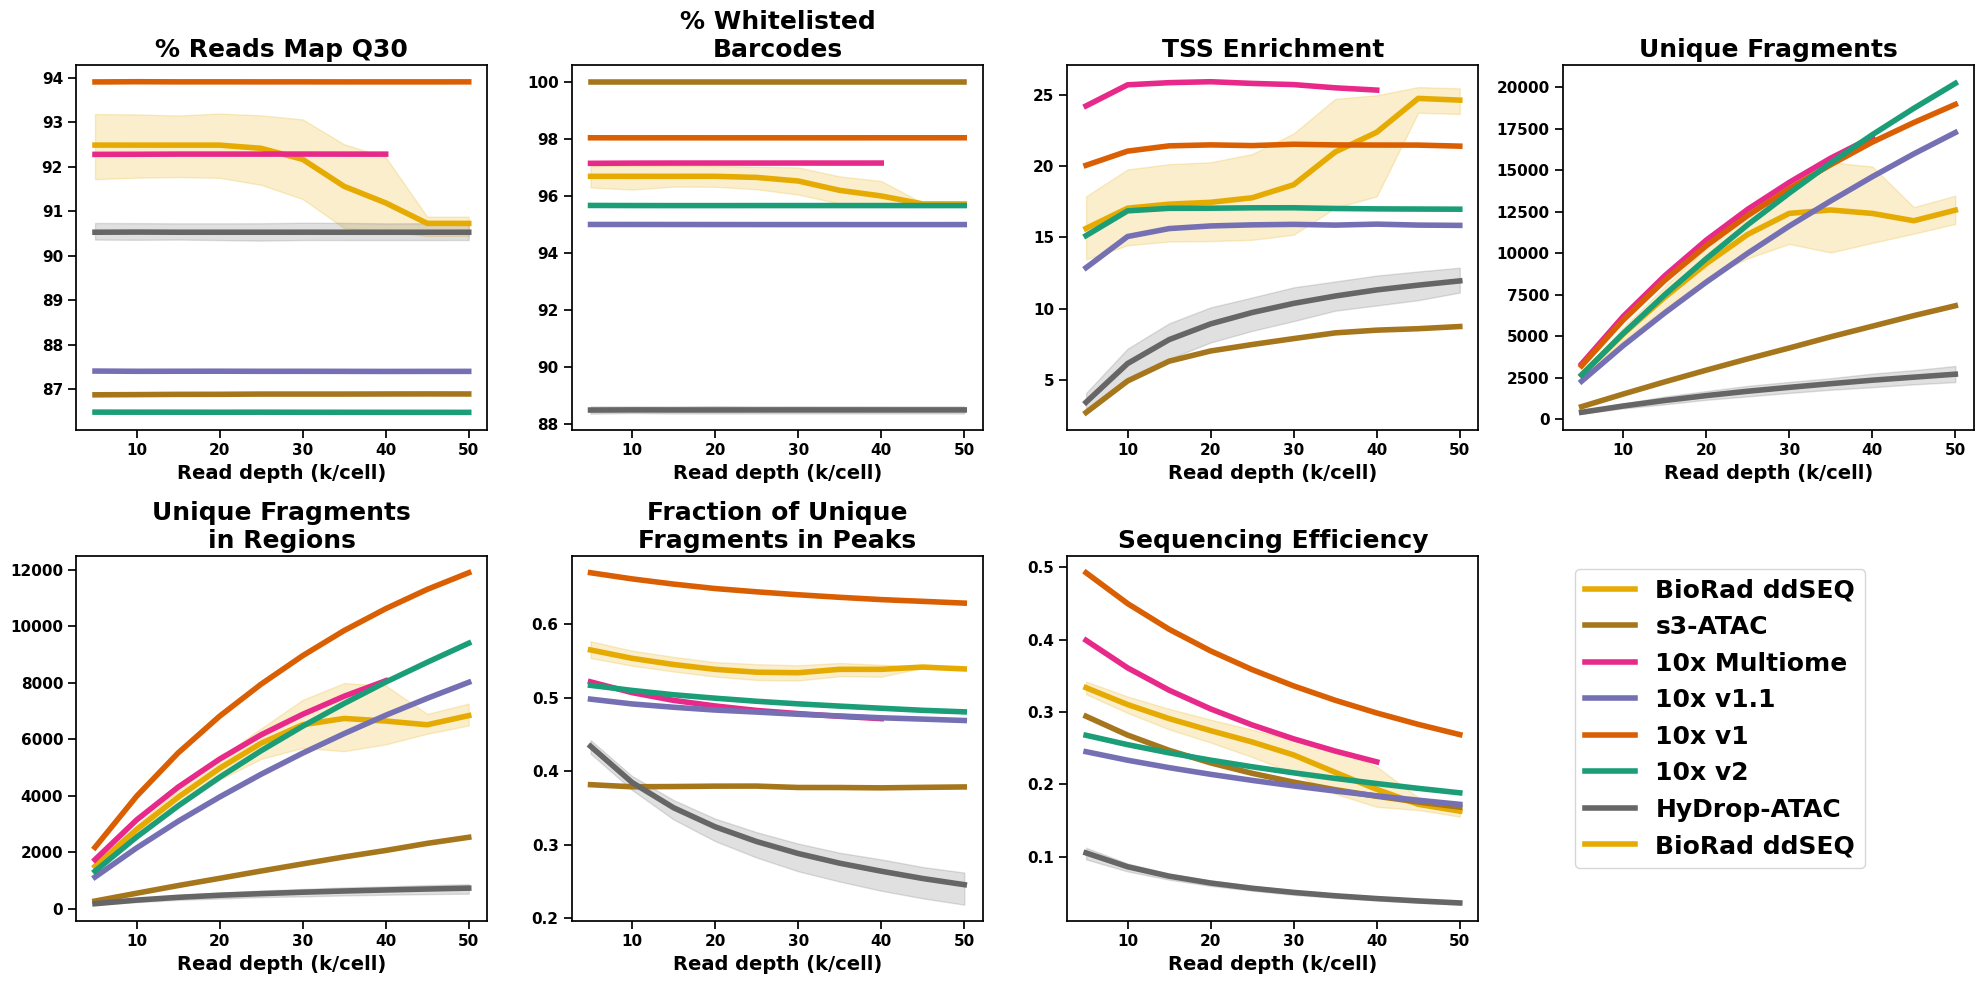

In [45]:
base_size = 5
n_cols = 4
n_rows = math.ceil(len(variables) / n_cols)
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * n_cols, base_size * n_rows)
)
fontsize_large = 18
for variable in variables:
    print(variable)
    ax = axes.flatten()[variables.index(variable)]
    sns.lineplot(
        x="depth",
        y=variable,
        hue="tech",
        data=metadata_df_combined,
        ax=ax,
        palette=tech_color_palette,
        linewidth=4,
    )
    # sns.scatterplot(x="depth", y=variable,hue="tech",data=metadata_df_combined, ax=axes[variables.index(variable)])
    ax.set_ylabel(None)
    ax.set_title(
        label=var_alias_dict[variable],
        fontdict={"fontsize": fontsize_large},
        fontweight="bold",
    )
    ax.get_legend().remove()
    ax.set_xlabel("Read depth (k/cell)", fontsize=14, fontweight="bold")


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [
    x[0 : len(tech_color_palette)] for x in [sum(lol, []) for lol in zip(*lines_labels)]
]
labels = [tech_alias_dict[x] for x in labels]

ax = axes.flatten()[-1]
ax.legend(lines, labels, loc="upper left", prop={"size": 18})
leg = ax.get_legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

plt.rcParams["font.weight"] = "bold"
ax.get_legend()

plt.tight_layout()
plt.savefig("plts/all_variables.svg", dpi=600, facecolor="w", bbox_inches="tight")
plt.savefig("plts/all_variables.png", dpi=600, facecolor="w", bbox_inches="tight")

plt.show()

# reshape fig
ddseq samples not sequenced to same depth

In [30]:
list(metadata_df_combined.groupby("sample").max().index)

['BIO_ddseq_m1c1',
 'BIO_ddseq_m1c2',
 'BIO_ddseq_m1c3',
 'BIO_ddseq_m1c4',
 'BIO_ddseq_m1c5',
 'BIO_ddseq_m1c6',
 'BIO_ddseq_m1c7',
 'BIO_ddseq_m1c8',
 'BIO_ddseq_m2c1',
 'BIO_ddseq_m2c2',
 'BIO_ddseq_m2c3',
 'BIO_ddseq_m2c4',
 'OHS_s3atac_mouse',
 'TXG_10xmultiome_e18mousebrainfresh',
 'TXG_10xv11_adultmousecortexchromiumx',
 'TXG_10xv1_adultmousefresh',
 'TXG_10xv2_adultmousecortex',
 'TXG_10xv2_adultmousecortexchromiumx',
 'VIB_hydrop_1',
 'VIB_hydrop_2',
 'VIB_hydrop_3',
 'VIB_hydrop_4',
 'VIB_hydrop_5']

In [31]:
metadata_df_combined["tech_sample"] = metadata_df_combined["tech"]

In [32]:
metadata_df_combined

,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,...,tech,n_reads_into_bwa,n_reads_q30,%_q30,n_reads,total_bc_found,%_barcodes,Total_unique_nr_frag_in_regions_in_cells,%_unique_nr_frag_in_regions_in_cells,tech_sample
5k__BIO_ddseq_m1c1,3.470557,3.454235,2955.0,2846.0,112.0,0.039063,1604.0,1543.0,0.546128,12.829726,...,ddseq,41366918.0,38589828.0,93.286689,21269894.0,20659577.0,97.130606,7069564.0,0.332374,ddseq
10k__BIO_ddseq_m1c1,3.771771,3.739216,5912.5,5485.5,428.0,0.076103,3126.5,2907.0,0.536424,13.795133,...,ddseq,82723994.0,77167880.0,93.283552,42534343.0,41313738.0,97.130307,13362681.0,0.314162,ddseq
15k__BIO_ddseq_m1c1,3.946771,3.899957,8846.5,7942.5,928.0,0.110529,4629.0,4143.0,0.528432,13.950410,...,ddseq,124093778.0,115755545.0,93.280700,63806762.0,61974357.0,97.128196,19038869.0,0.298383,ddseq
20k__BIO_ddseq_m1c1,4.072213,4.009430,11809.0,10219.5,1596.0,0.142252,6097.5,5273.5,0.521378,14.080309,...,ddseq,165440136.0,154322741.0,93.280110,85066984.0,82623093.0,97.127098,24188293.0,0.284344,ddseq
5k__BIO_ddseq_m1c2,3.447623,3.432568,2803.0,2707.5,97.0,0.037310,1500.0,1447.0,0.546406,12.550000,...,ddseq,45614044.0,42500981.0,93.175209,23440446.0,22783080.0,97.195591,7439654.0,0.317385,ddseq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30k__VIB_hydrop_5,3.469675,3.317646,2949.0,2078.0,652.0,0.230043,896.0,663.0,0.303361,11.906977,...,hydrop,123417736.0,111437898.0,90.293261,61748813.0,54531313.0,88.311516,2831155.0,0.045850,hydrop
35k__VIB_hydrop_5,3.535547,3.363424,3432.0,2309.0,850.0,0.258577,996.0,715.0,0.290142,12.491228,...,hydrop,143978088.0,130002421.0,90.293199,72035537.0,63614937.0,88.310492,3022930.0,0.041964,hydrop
40k__VIB_hydrop_5,3.594834,3.404663,3934.0,2539.0,1057.0,0.283368,1088.0,759.0,0.278176,12.945946,...,hydrop,164534460.0,148562240.0,90.292477,82320378.0,72698122.0,88.311210,3186601.0,0.038710,hydrop
45k__VIB_hydrop_5,3.646404,3.437751,4430.0,2740.0,1297.0,0.308246,1180.0,799.0,0.267585,13.250000,...,hydrop,185095898.0,167126207.0,90.291686,92607847.0,81783224.0,88.311333,3326930.0,0.035925,hydrop


In [33]:
ddseq_dict = {
    "BIO_ddseq_m1c1": "ddseq1",
    "BIO_ddseq_m1c2": "ddseq1",
    "BIO_ddseq_m1c3": "ddseq1",
    "BIO_ddseq_m1c4": "ddseq1",
    "BIO_ddseq_m1c5": "ddseq1",
    "BIO_ddseq_m1c6": "ddseq1",
    "BIO_ddseq_m1c7": "ddseq1",
    "BIO_ddseq_m1c8": "ddseq1",
    "BIO_ddseq_m2c1": "ddseq2",
    "BIO_ddseq_m2c2": "ddseq2",
    "BIO_ddseq_m2c3": "ddseq2",
    "BIO_ddseq_m2c4": "ddseq2",
}

In [34]:
for x in metadata_df_combined.index:
    print(x)
    # print(metadata_df_combined.at[x, "tech_sample"])
    if "ddseq" in x:
        metadata_df_combined.at[x, "tech"]
        print(ddseq_dict[metadata_df_combined.at[x, "sample"]])
        metadata_df_combined.at[x, "tech_sample"] = ddseq_dict[
            metadata_df_combined.at[x, "sample"]
        ]
    if "chromiumx" in x:
        print(metadata_df_combined.at[x, "tech"] + "c")
        metadata_df_combined.at[x, "tech_sample"] = (
            metadata_df_combined.at[x, "tech"] + "c"
        )

5k__BIO_ddseq_m1c1
ddseq1
10k__BIO_ddseq_m1c1
ddseq1
15k__BIO_ddseq_m1c1
ddseq1
20k__BIO_ddseq_m1c1
ddseq1
5k__BIO_ddseq_m1c2
ddseq1
10k__BIO_ddseq_m1c2
ddseq1
15k__BIO_ddseq_m1c2
ddseq1
20k__BIO_ddseq_m1c2
ddseq1
25k__BIO_ddseq_m1c2
ddseq1
30k__BIO_ddseq_m1c2
ddseq1
5k__BIO_ddseq_m1c3
ddseq1
10k__BIO_ddseq_m1c3
ddseq1
15k__BIO_ddseq_m1c3
ddseq1
20k__BIO_ddseq_m1c3
ddseq1
25k__BIO_ddseq_m1c3
ddseq1
30k__BIO_ddseq_m1c3
ddseq1
5k__BIO_ddseq_m1c4
ddseq1
10k__BIO_ddseq_m1c4
ddseq1
15k__BIO_ddseq_m1c4
ddseq1
20k__BIO_ddseq_m1c4
ddseq1
25k__BIO_ddseq_m1c4
ddseq1
30k__BIO_ddseq_m1c4
ddseq1
5k__BIO_ddseq_m1c5
ddseq1
10k__BIO_ddseq_m1c5
ddseq1
15k__BIO_ddseq_m1c5
ddseq1
20k__BIO_ddseq_m1c5
ddseq1
25k__BIO_ddseq_m1c5
ddseq1
30k__BIO_ddseq_m1c5
ddseq1
35k__BIO_ddseq_m1c5
ddseq1
40k__BIO_ddseq_m1c5
ddseq1
5k__BIO_ddseq_m1c6
ddseq1
10k__BIO_ddseq_m1c6
ddseq1
15k__BIO_ddseq_m1c6
ddseq1
20k__BIO_ddseq_m1c6
ddseq1
25k__BIO_ddseq_m1c6
ddseq1
5k__BIO_ddseq_m1c7
ddseq1
10k__BIO_ddseq_m1c7
ddseq1
15k__BIO

In [35]:
metadata_df_combined["tech_sample"].unique()

array(['ddseq1', 'ddseq2', 's3atac', '10xmultiome', '10xv11c', '10xv1',
       '10xv2', '10xv2c', 'hydrop'], dtype=object)

In [36]:
tech_sample_alias_dict = {
    "10xv2": "10x v2",
    "10xv2c": "10x v2 Chromium X",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 Chromium X",
    "10xmultiome": "10x Multiome",
    "mtscatac": "mtscATAC-seq",
    "ddseq1": "BioRad ddSEQ Sample 1",
    "ddseq2": "BioRad ddSEQ Sample 2",
    "s3atac": "s3-ATAC",
    "hydrop": "HyDrop-ATAC",
}

In [37]:
tech_sample_color_palette = {
    "10xv2": "#1b9e77",
    "10xv2c": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xv11c": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq1": "#e6ab02",
    "ddseq2": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [38]:
metadata_df_combined["tech_sample"].unique()

array(['ddseq1', 'ddseq2', 's3atac', '10xmultiome', '10xv11c', '10xv1',
       '10xv2', '10xv2c', 'hydrop'], dtype=object)

In [39]:
# sns.set_style(style=None)

%_q30
%_barcodes
TSS_enrichment
Unique_nr_frag
Unique_nr_frag_in_regions
FRIP
%_unique_nr_frag_in_regions_in_cells


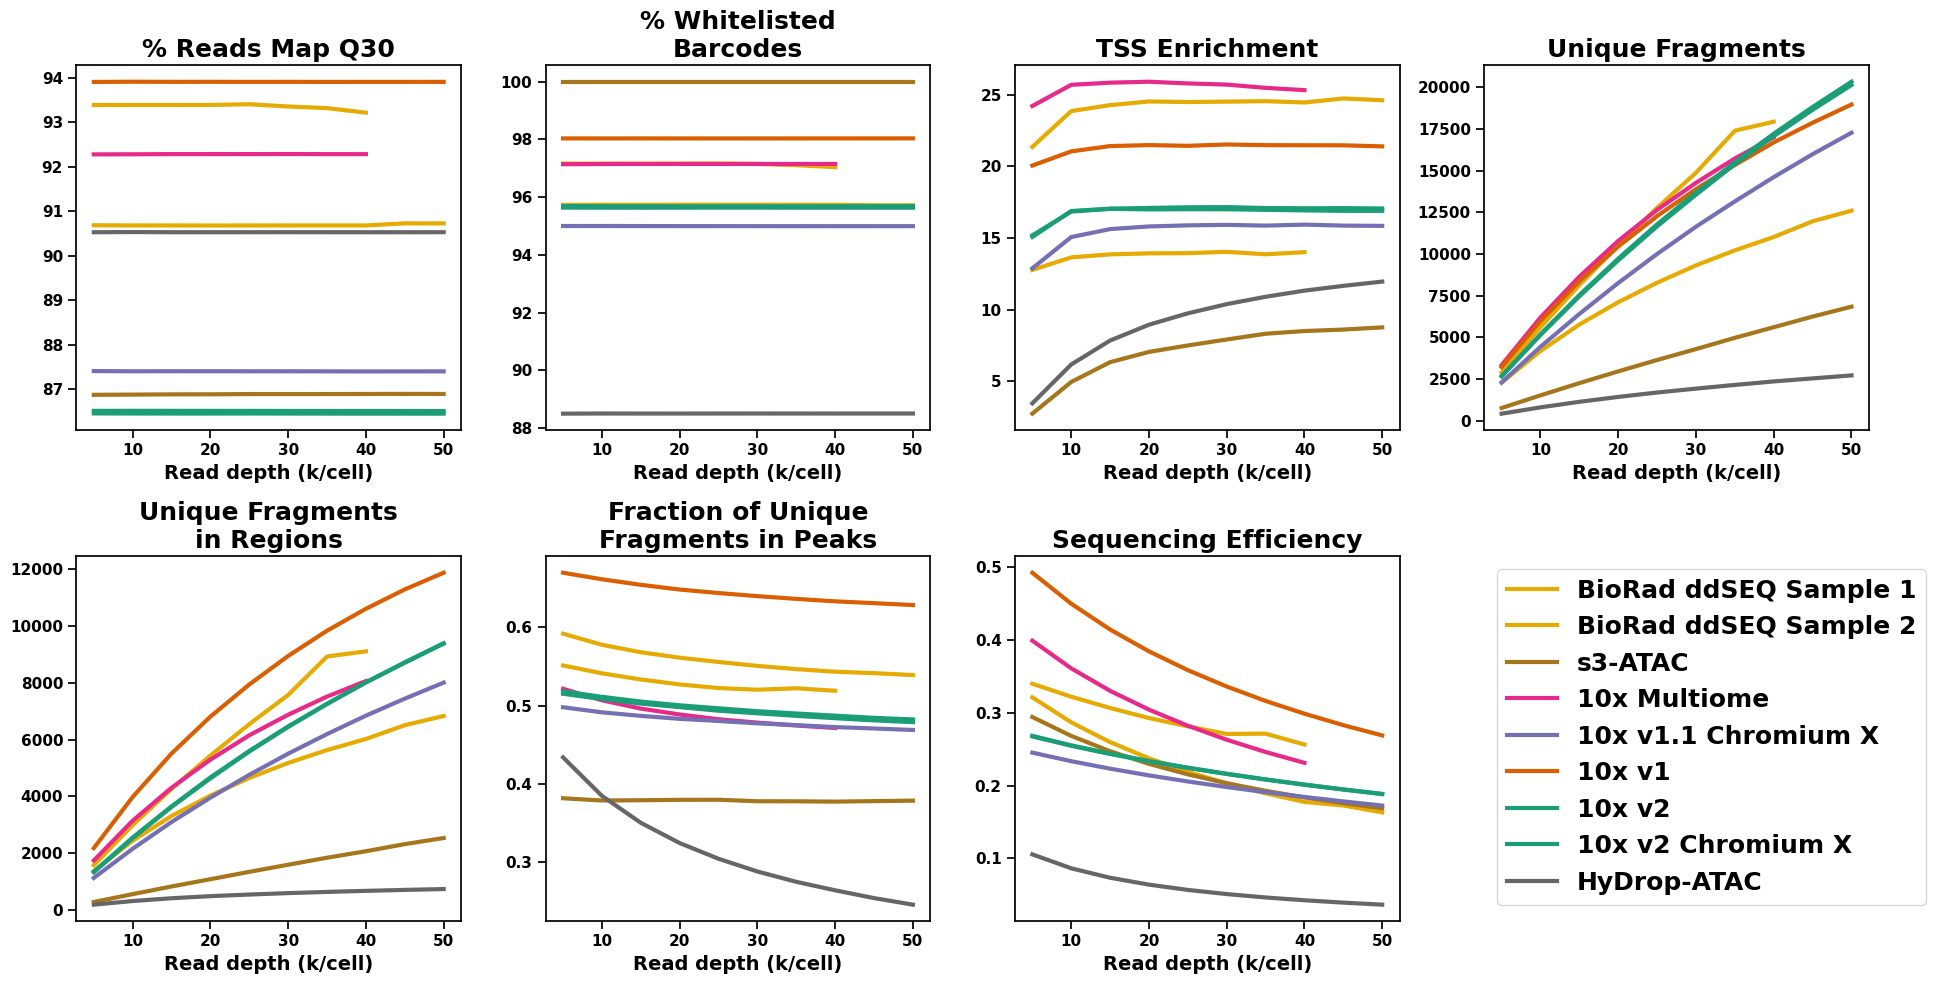

In [40]:
base_size = 5
n_cols = 4
n_rows = math.ceil(len(variables) / n_cols)
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * n_cols, base_size * n_rows)
)
fontsize_large = 18
for variable in variables:
    print(variable)
    ax = axes.flatten()[variables.index(variable)]
    sns.lineplot(
        x="depth",
        y=variable,
        hue="tech_sample",
        data=metadata_df_combined,
        ax=ax,
        errorbar=None,
        palette=tech_sample_color_palette,
        linewidth=3,
    )
    # sns.scatterplot(x="depth", y=variable,hue="tech",data=metadata_df_combined, ax=axes[variables.index(variable)])
    ax.set_ylabel(None)
    ax.set_title(
        label=var_alias_dict[variable],
        fontdict={"fontsize": fontsize_large},
        fontweight="bold",
    )
    ax.get_legend().remove()
    ax.set_xlabel("Read depth (k/cell)", fontsize=14, fontweight="bold")


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [
    x[0 : len(metadata_df_combined["tech_sample"].unique())]
    for x in [sum(lol, []) for lol in zip(*lines_labels)]
]
labels = [tech_sample_alias_dict[x] for x in labels]

ax = axes.flatten()[-1]
ax.legend(lines, labels, loc="upper left", prop={"size": 18})
leg = ax.get_legend()
for line in leg.get_lines():
    line.set_linewidth(3)

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

plt.rcParams["font.weight"] = "bold"
ax.get_legend()

plt.tight_layout()
plt.savefig("plts/all_variables.svg", dpi=600, facecolor="w", bbox_inches="tight")
plt.savefig("plts/all_variables.png", dpi=600, facecolor="w", bbox_inches="tight")

plt.show()

In [41]:
metadata_df_combined.pivot_table(
    values="TSS_enrichment",
    index="depth",
    columns="tech_sample",
    aggfunc="median",
)

tech_sample,10xmultiome,10xv1,10xv11c,10xv2,10xv2c,ddseq1,ddseq2,hydrop,s3atac
depth,,,,,,,,,
5,24.206897,20.050000,12.880123,15.067987,15.182746,12.723505,21.475000,3.900000,2.741379
10,25.683721,21.040000,15.062505,16.879252,16.839643,13.537961,23.784382,6.750000,4.950000
15,25.834483,21.410072,15.617743,17.044728,17.029901,13.805317,24.195870,8.113208,6.333333
20,25.899772,21.477663,15.802581,17.094615,16.993056,13.930498,24.399520,9.257143,7.049180
25,25.782082,21.428571,15.878377,17.139175,17.002959,13.897436,24.363371,9.950000,7.500000
30,25.698730,21.521368,15.913665,17.151772,17.000000,14.034483,24.375217,10.601852,7.915493
35,25.473373,21.474860,15.861845,17.088264,16.960958,13.859880,24.425152,11.019608,8.315789
40,25.312500,21.467337,15.929589,17.071196,16.923600,14.008403,24.377070,11.450000,8.506329
45,NaN,21.462963,15.861413,17.079604,16.891292,NaN,24.944262,11.818182,8.608696


In [42]:
metadata_df_combined.groupby("sample")["depth"].max()

sample
BIO_ddseq_m1c1                          20
BIO_ddseq_m1c2                          30
BIO_ddseq_m1c3                          30
BIO_ddseq_m1c4                          30
BIO_ddseq_m1c5                          40
BIO_ddseq_m1c6                          25
BIO_ddseq_m1c7                          25
BIO_ddseq_m1c8                          35
BIO_ddseq_m2c1                          50
BIO_ddseq_m2c2                          40
BIO_ddseq_m2c3                          50
BIO_ddseq_m2c4                          50
OHS_s3atac_mouse                        50
TXG_10xmultiome_e18mousebrainfresh      40
TXG_10xv11_adultmousecortexchromiumx    50
TXG_10xv1_adultmousefresh               50
TXG_10xv2_adultmousecortex              50
TXG_10xv2_adultmousecortexchromiumx     50
VIB_hydrop_1                            50
VIB_hydrop_2                            50
VIB_hydrop_3                            50
VIB_hydrop_4                            50
VIB_hydrop_5                            50
Name

In [43]:
df_40k = metadata_df_combined[metadata_df_combined["depth"] == 40]

In [44]:
df_40k.to_csv("df_40k.csv")